In [8]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### 1 - Linear Regression Impact on Outliers

In [12]:
X = np.arange(0, 10, 1)
Y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

model_lr = LinearRegression()
model_lr.fit(X.reshape(-1,1), Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print(f'Weight(w) : {model_lr.coef_[0]}')
print(f'Intercept(b) : {model_lr.intercept_}')

Weight(w) : -3.557272727272728
Intercept(b) : 3.916727272727277


In [15]:
Y_hat_train = model_lr.predict(X.reshape(-1,1))

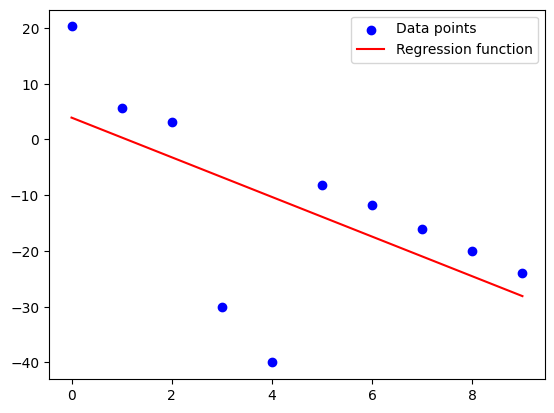

In [16]:
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_hat_train, color='red', label='Regression function')
plt.legend()
plt.show()

In [22]:
def loss_function(weight, intercept, X, Y, beta):
    cum_loss = 0
    for idx, x in enumerate(X):
        y_hat = weight * x + intercept
        loss = ((Y[idx] - y_hat)**2) / (((Y[idx] - y_hat)**2) + (beta**2))
        cum_loss = cum_loss + loss
    
    print(f'Beta : {beta}')
    print(f'Loss function value : {cum_loss/len(Y):.4f}')


In [23]:
beta_arr = [1, 1e-6, 1000]

for beta in beta_arr:
    loss_function(-4, 12, X, Y, beta=beta)

Beta : 1
Loss function value : 0.4354
Beta : 1e-06
Loss function value : 1.0000
Beta : 1000
Loss function value : 0.0002


In [24]:
for beta in beta_arr:
    loss_function(-3.55, 3.91, X, Y, beta=beta)

Beta : 1
Loss function value : 0.9728
Beta : 1e-06
Loss function value : 1.0000
Beta : 1000
Loss function value : 0.0002


### 2 - Loss Function

In [27]:
def mean_squared_error(Y, Y_hat):
    n = len(Y)
    cum_loss = 0

    for idx, y in enumerate(Y):
        loss = (y - Y_hat[idx])**2
        print(f'y={y}, y_hat={Y_hat[idx]} : {loss:.4f}')
        cum_loss = cum_loss + loss

    mse = cum_loss/n

    print(f'MSE : {mse:.4f}')

In [28]:
Y = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1])
Y_hat = np.array([0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

mean_squared_error(Y, Y_hat)

y=1, y_hat=0.005 : 0.9900
y=1, y_hat=0.01 : 0.9801
y=1, y_hat=0.05 : 0.9025
y=1, y_hat=0.1 : 0.8100
y=1, y_hat=0.2 : 0.6400
y=1, y_hat=0.3 : 0.4900
y=1, y_hat=0.4 : 0.3600
y=1, y_hat=0.5 : 0.2500
y=1, y_hat=0.6 : 0.1600
y=1, y_hat=0.7 : 0.0900
y=1, y_hat=0.8 : 0.0400
y=1, y_hat=0.9 : 0.0100
y=1, y_hat=1.0 : 0.0000
MSE : 0.4402


In [35]:
def binary_cross_entropy(Y, Y_hat):
    n = len(Y)
    cum_loss = 0

    for idx, y in enumerate(Y):
        loss = (y * np.log(Y_hat[idx]) + (1 - y) * (1- Y_hat[idx])) * (-1)
        print(f'y={y}, y_hat={Y_hat[idx]} : {loss:.4f}')
        cum_loss = cum_loss + loss

    bce = cum_loss/n

    print(f'BCE : {bce:.4f}')

In [36]:
binary_cross_entropy(Y, Y_hat)

y=1, y_hat=0.005 : 5.2983
y=1, y_hat=0.01 : 4.6052
y=1, y_hat=0.05 : 2.9957
y=1, y_hat=0.1 : 2.3026
y=1, y_hat=0.2 : 1.6094
y=1, y_hat=0.3 : 1.2040
y=1, y_hat=0.4 : 0.9163
y=1, y_hat=0.5 : 0.6931
y=1, y_hat=0.6 : 0.5108
y=1, y_hat=0.7 : 0.3567
y=1, y_hat=0.8 : 0.2231
y=1, y_hat=0.9 : 0.1054
y=1, y_hat=1.0 : -0.0000
BCE : 1.6016


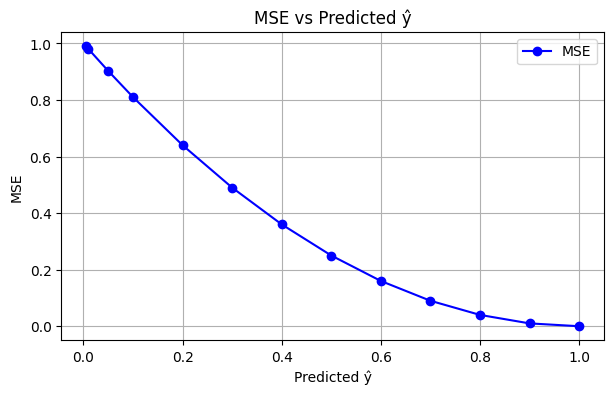

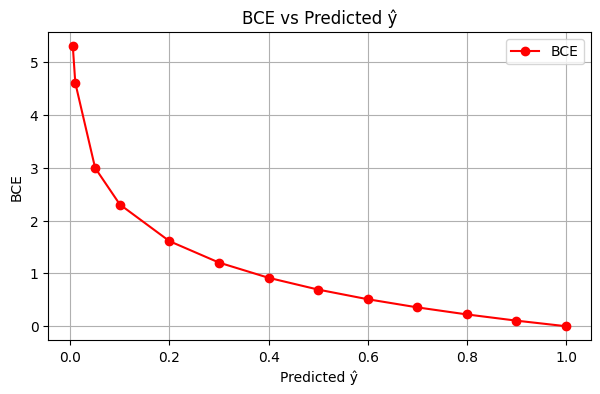

In [38]:
mse = [0.9900, 0.9801, 0.9025, 0.8100, 0.6400, 0.4900, 0.3600, 0.2500,
       0.1600, 0.0900, 0.0400, 0.0100, 0.0000]

bce = [5.2983, 4.6052, 2.9957, 2.3026, 1.6094, 1.2040, 0.9163, 0.6931,
       0.5108, 0.3567, 0.2231, 0.1054, -0.0000]

# Plot MSE
plt.figure(figsize=(7,4))
plt.plot(Y_hat, mse, 'bo-', label='MSE')
plt.xlabel('Predicted ŷ')
plt.ylabel('MSE')
plt.title('MSE vs Predicted ŷ')
plt.grid(True)
plt.legend()
plt.show()

# Plot BCE
plt.figure(figsize=(7,4))
plt.plot(Y_hat, bce, 'ro-', label='BCE')
plt.xlabel('Predicted ŷ')
plt.ylabel('BCE')
plt.title('BCE vs Predicted ŷ')
plt.grid(True)
plt.legend()
plt.show()
